# 准备工作
## 准备数据
在准备工作阶段首先应该观察数据，并对数据做一定的处理
### 观察整个数据集

In [58]:
# 导入相关数据包
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv('./house_price/train.csv')

In [60]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
data = data.set_index(['Id'])

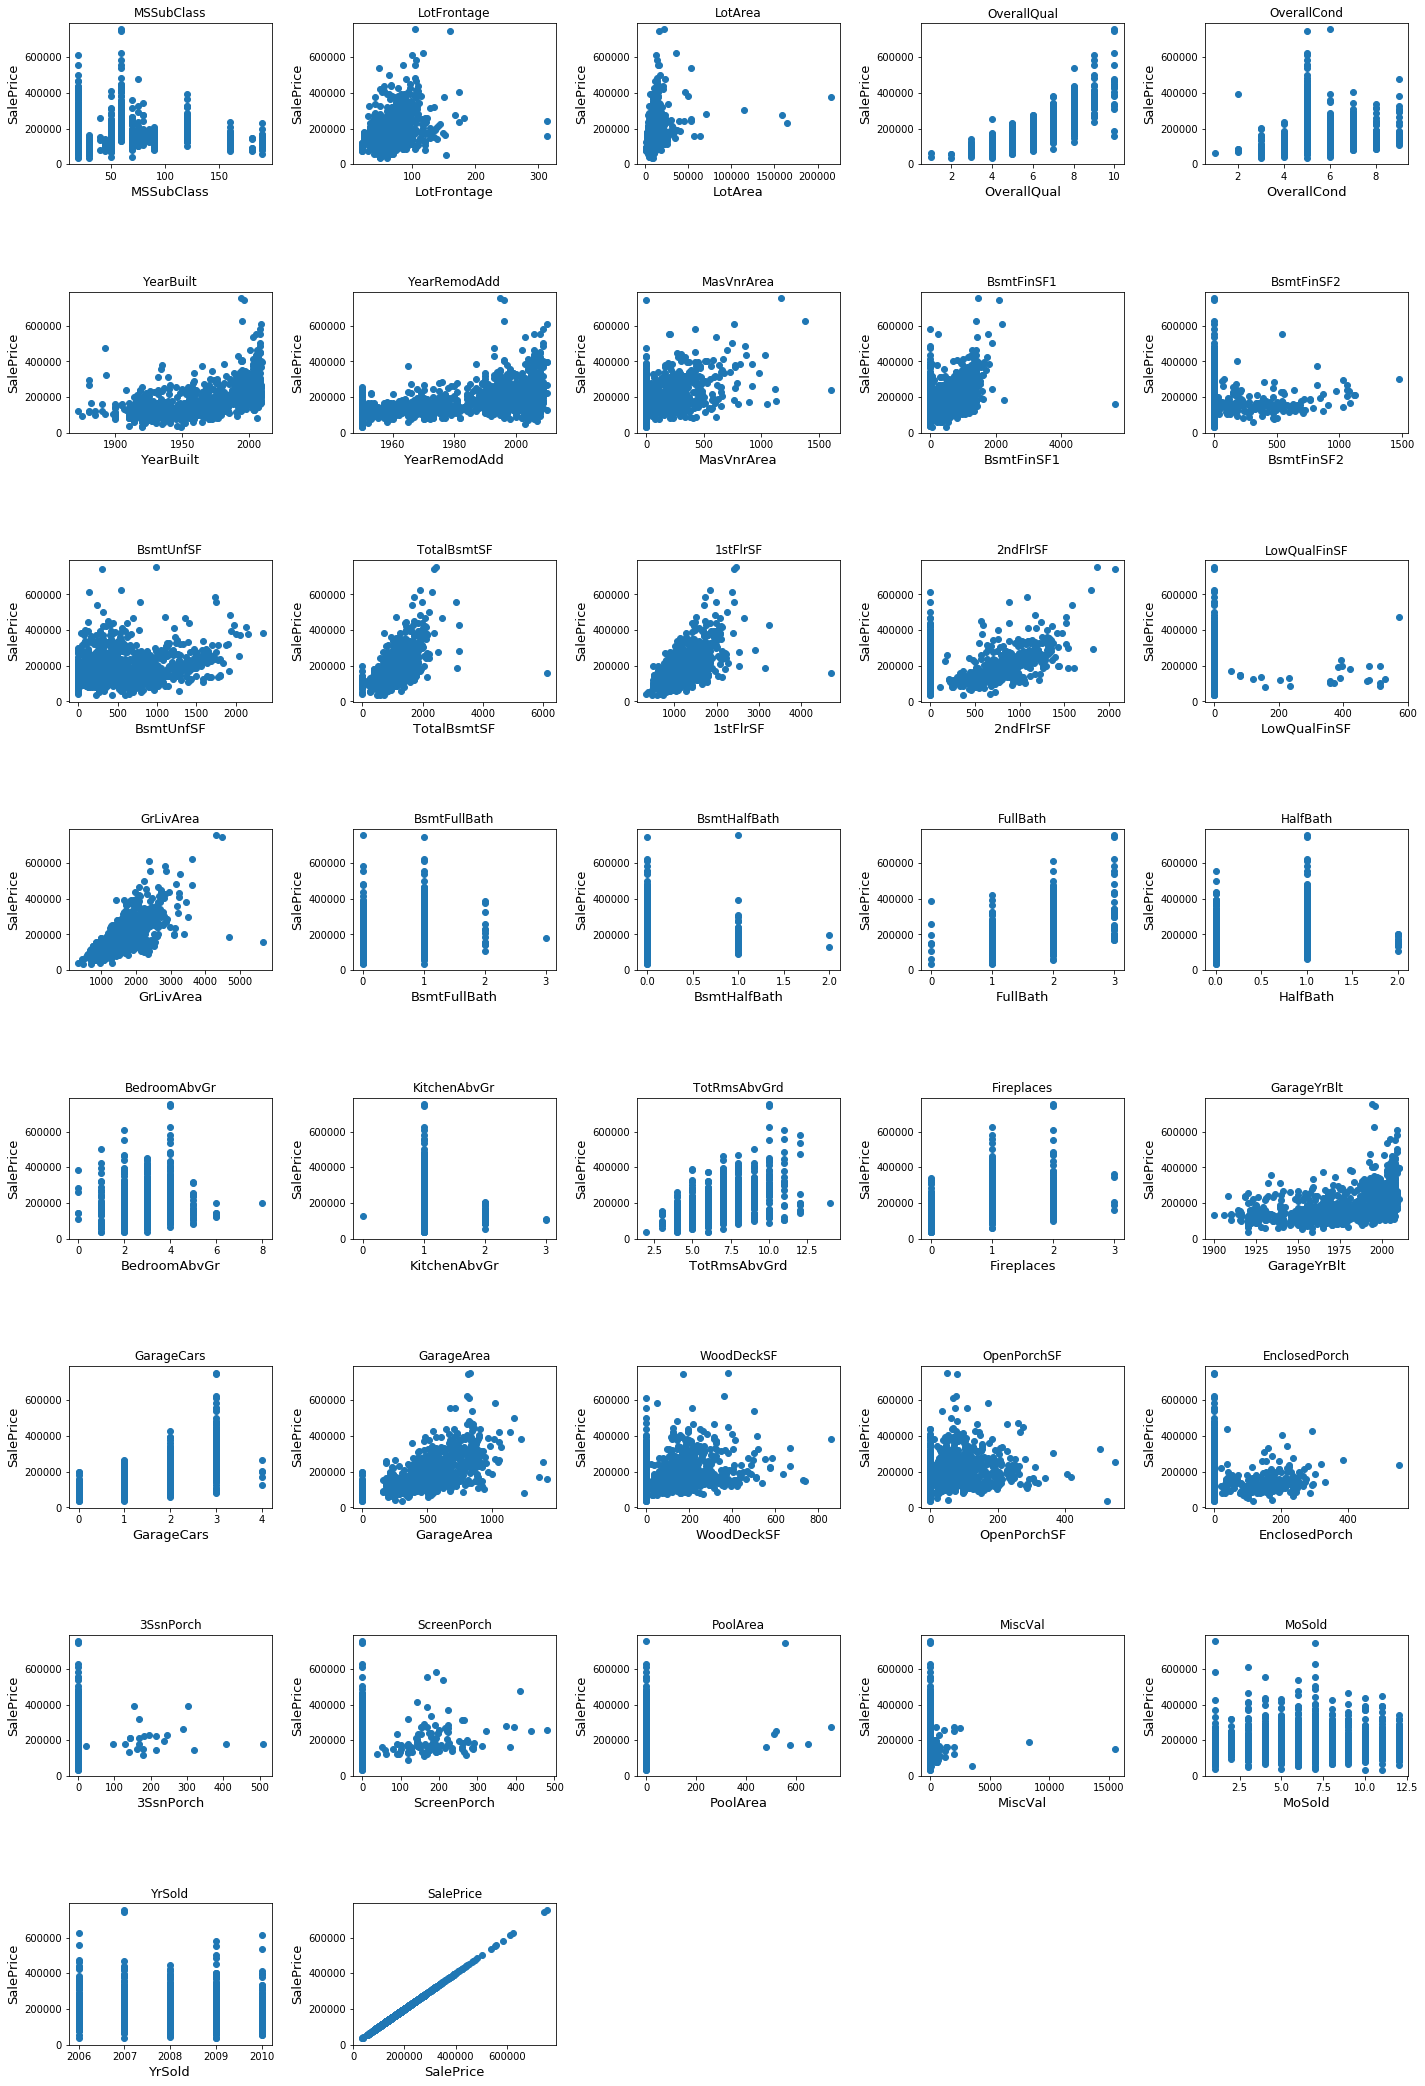

In [39]:
fig = plt.figure(figsize=(24, 36))
count = 1
for x in data[data.columns[data.dtypes != 'object']]:
    ax = fig.add_subplot(8,5, count)
    ax.scatter(y=data['SalePrice'], x=data[x])
    ax.set_xlabel(x, fontsize=13)
    ax.set_ylabel('SalePrice', fontsize=13)
    ax.set_title(x)
    count += 1
plt.subplots_adjust(hspace=0.9, bottom=0.1, wspace=0.4)

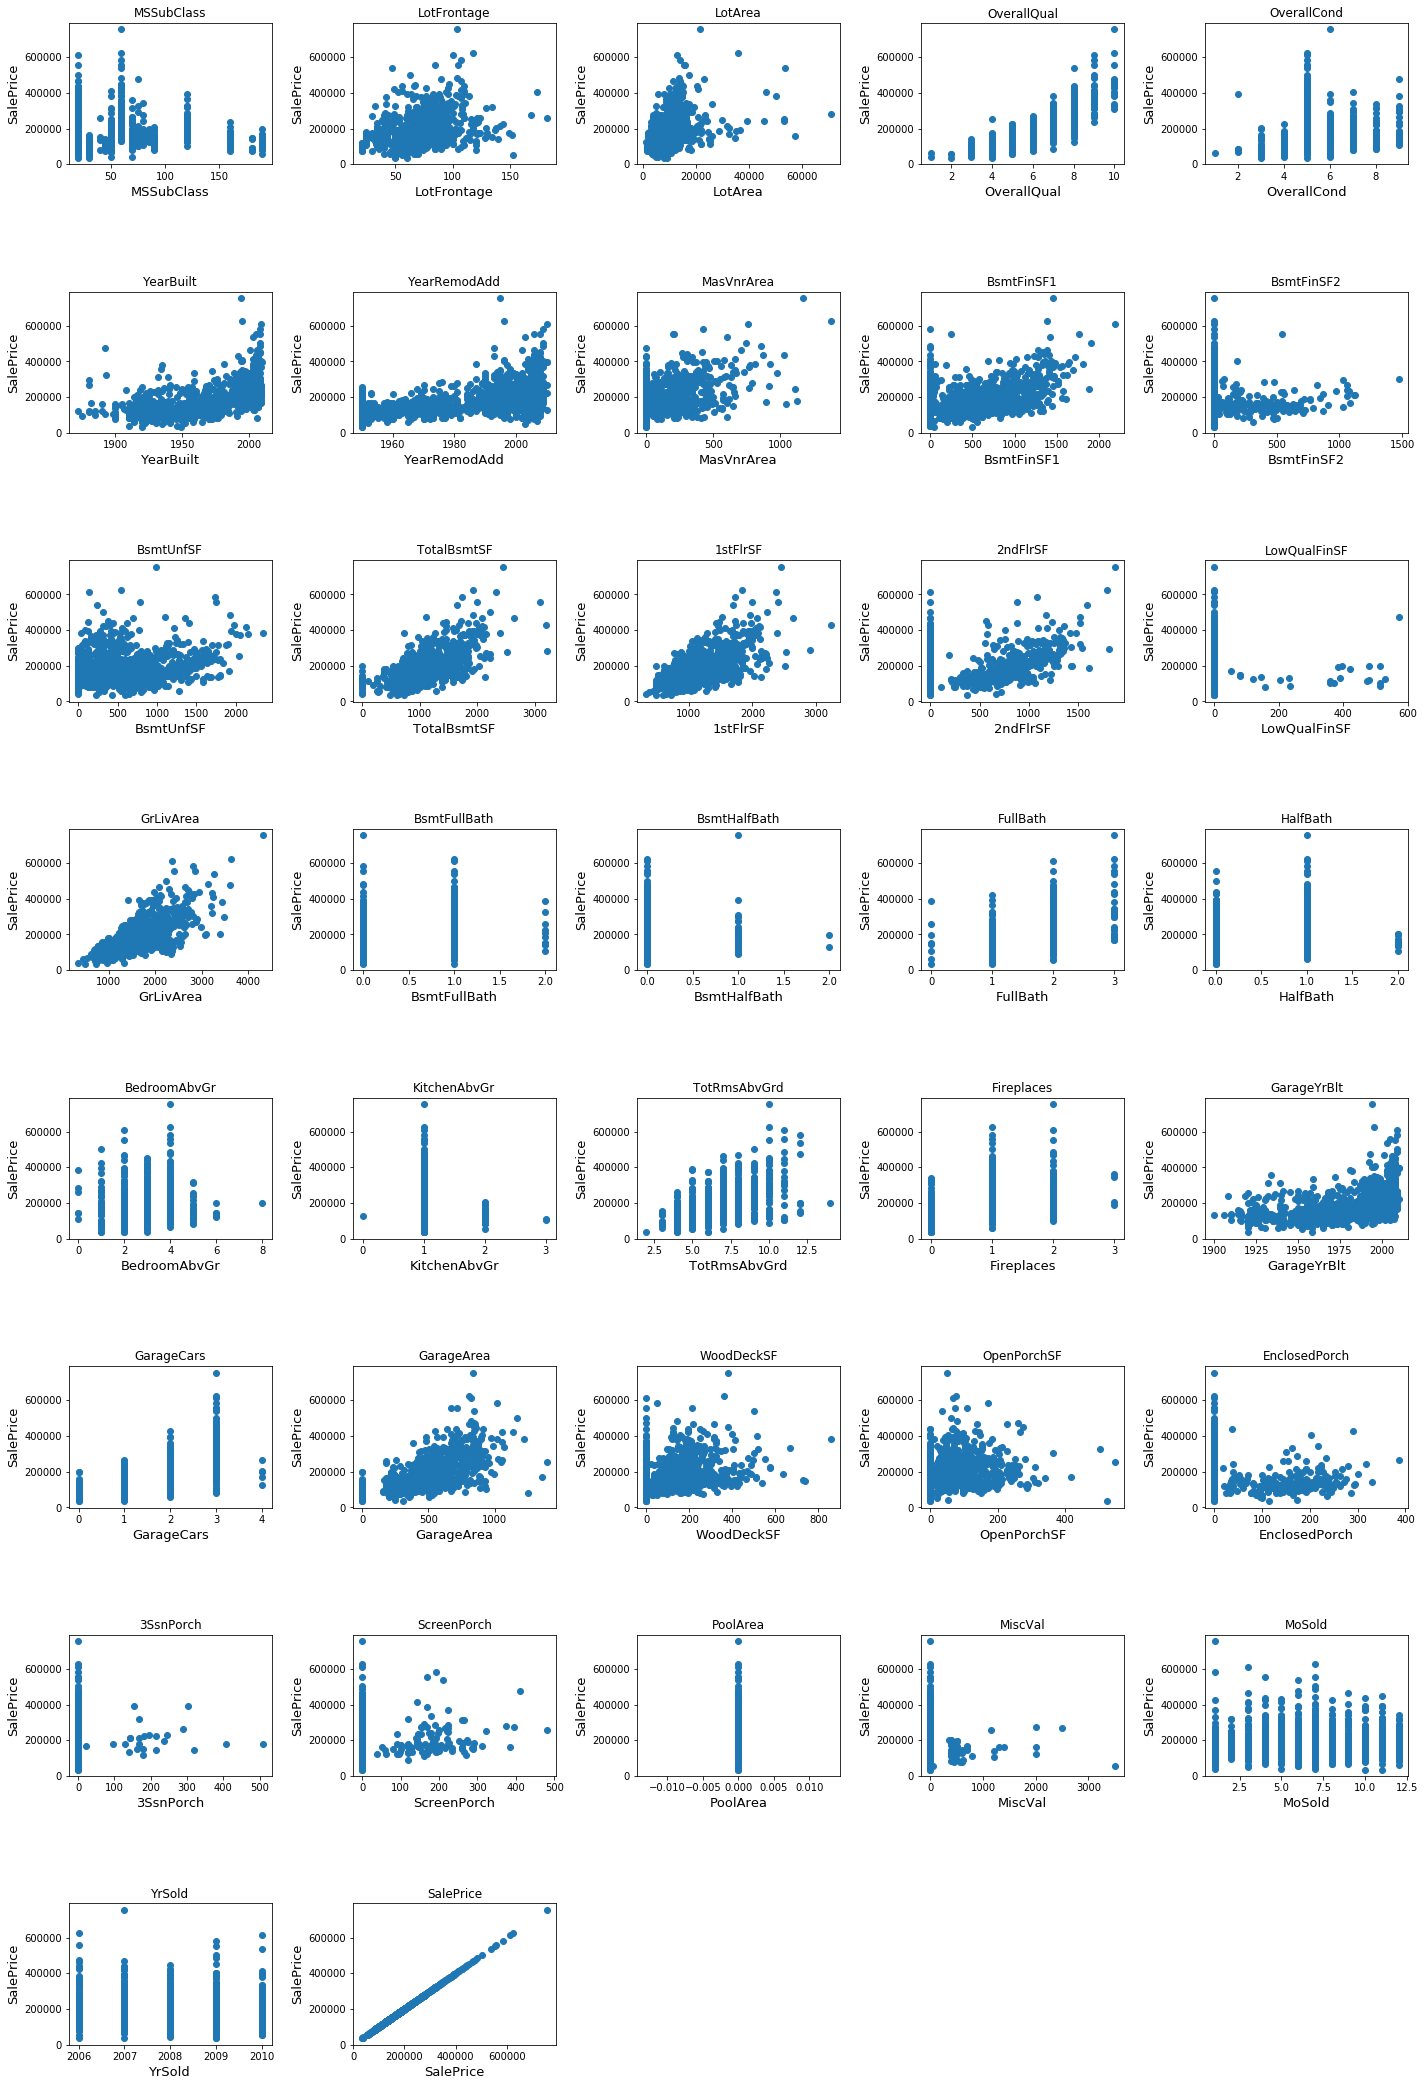

In [62]:
data.drop(data[data['LotFrontage'] > 300].index, inplace=True)
data.drop(data[data['LotArea'] > 100000].index, inplace=True)
data.drop(data[data['MasVnrArea'] > 1500].index, inplace=True)
data.drop(data[(data['GrLivArea'] > 4000) & (data['SalePrice']<300000)].index, inplace=True)
data.drop(data[data['BsmtFullBath'] == 3].index, inplace=True)
data.drop(data[data['EnclosedPorch'] > 400].index, inplace=True)
data.drop(data[data['PoolArea'] > 200].index, inplace=True)
data.drop(data[data['MiscVal'] > 5000].index, inplace=True)

fig = plt.figure(figsize=(24, 36))
count = 1
for x in data[data.columns[data.dtypes != 'object']]:
    ax = fig.add_subplot(8,5, count)
    ax.scatter(y=data['SalePrice'], x=data[x])
    ax.set_xlabel(x, fontsize=13)
    ax.set_ylabel('SalePrice', fontsize=13)
    ax.set_title(x)
    count += 1
plt.subplots_adjust(hspace=0.9, bottom=0.1, wspace=0.4)

In [65]:
x_train, y_train = data.loc[:,:'SaleCondition'], data['SalePrice']
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443 entries, 1 to 1460
Data columns (total 79 columns):
MSSubClass       1443 non-null int64
MSZoning         1443 non-null object
LotFrontage      1190 non-null float64
LotArea          1443 non-null int64
Street           1443 non-null object
Alley            90 non-null object
LotShape         1443 non-null object
LandContour      1443 non-null object
Utilities        1443 non-null object
LotConfig        1443 non-null object
LandSlope        1443 non-null object
Neighborhood     1443 non-null object
Condition1       1443 non-null object
Condition2       1443 non-null object
BldgType         1443 non-null object
HouseStyle       1443 non-null object
OverallQual      1443 non-null int64
OverallCond      1443 non-null int64
YearBuilt        1443 non-null int64
YearRemodAdd     1443 non-null int64
RoofStyle        1443 non-null object
RoofMatl         1443 non-null object
Exterior1st      1443 non-null object
Exterior2nd      1443 non-

从上面的数据摘要中可以发现`Alley`、`PoolQC`、`Fence`和`MiscFeature`这4个特征缺失了大量数据，出于数据完整性的考虑，为了防止这部分数据影响训练的性能，需剔除这部分特征

### 数值型数据

In [42]:
x_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1443.000000,1190.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1435.000000,1443.000000,1443.000000,...,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.0,1443.000000,1443.000000,1443.000000
mean,56.836452,69.352941,9994.164241,6.089397,5.574498,1971.231462,1984.806653,101.941463,434.533611,45.567568,...,471.691615,93.295218,46.295218,21.729730,3.449757,14.796258,0.0,25.290367,6.325710,2007.822592
std,42.318663,21.699720,5385.167400,1.376811,1.113759,30.293075,20.694379,175.374477,430.327456,160.187434,...,212.350823,123.864205,65.324976,59.742725,29.487287,54.723654,0.0,180.678658,2.702918,1.330477
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,0.000000,...,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9430.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,378.000000,0.000000,...,478.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11500.000000,7.000000,6.000000,2001.000000,2004.000000,164.500000,705.500000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000
max,190.000000,182.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2188.000000,1474.000000,...,1390.000000,857.000000,547.000000,386.000000,508.000000,480.000000,0.0,3500.000000,12.000000,2010.000000


e:\python\python36\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
e:\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
e:\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
e:\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
e:\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


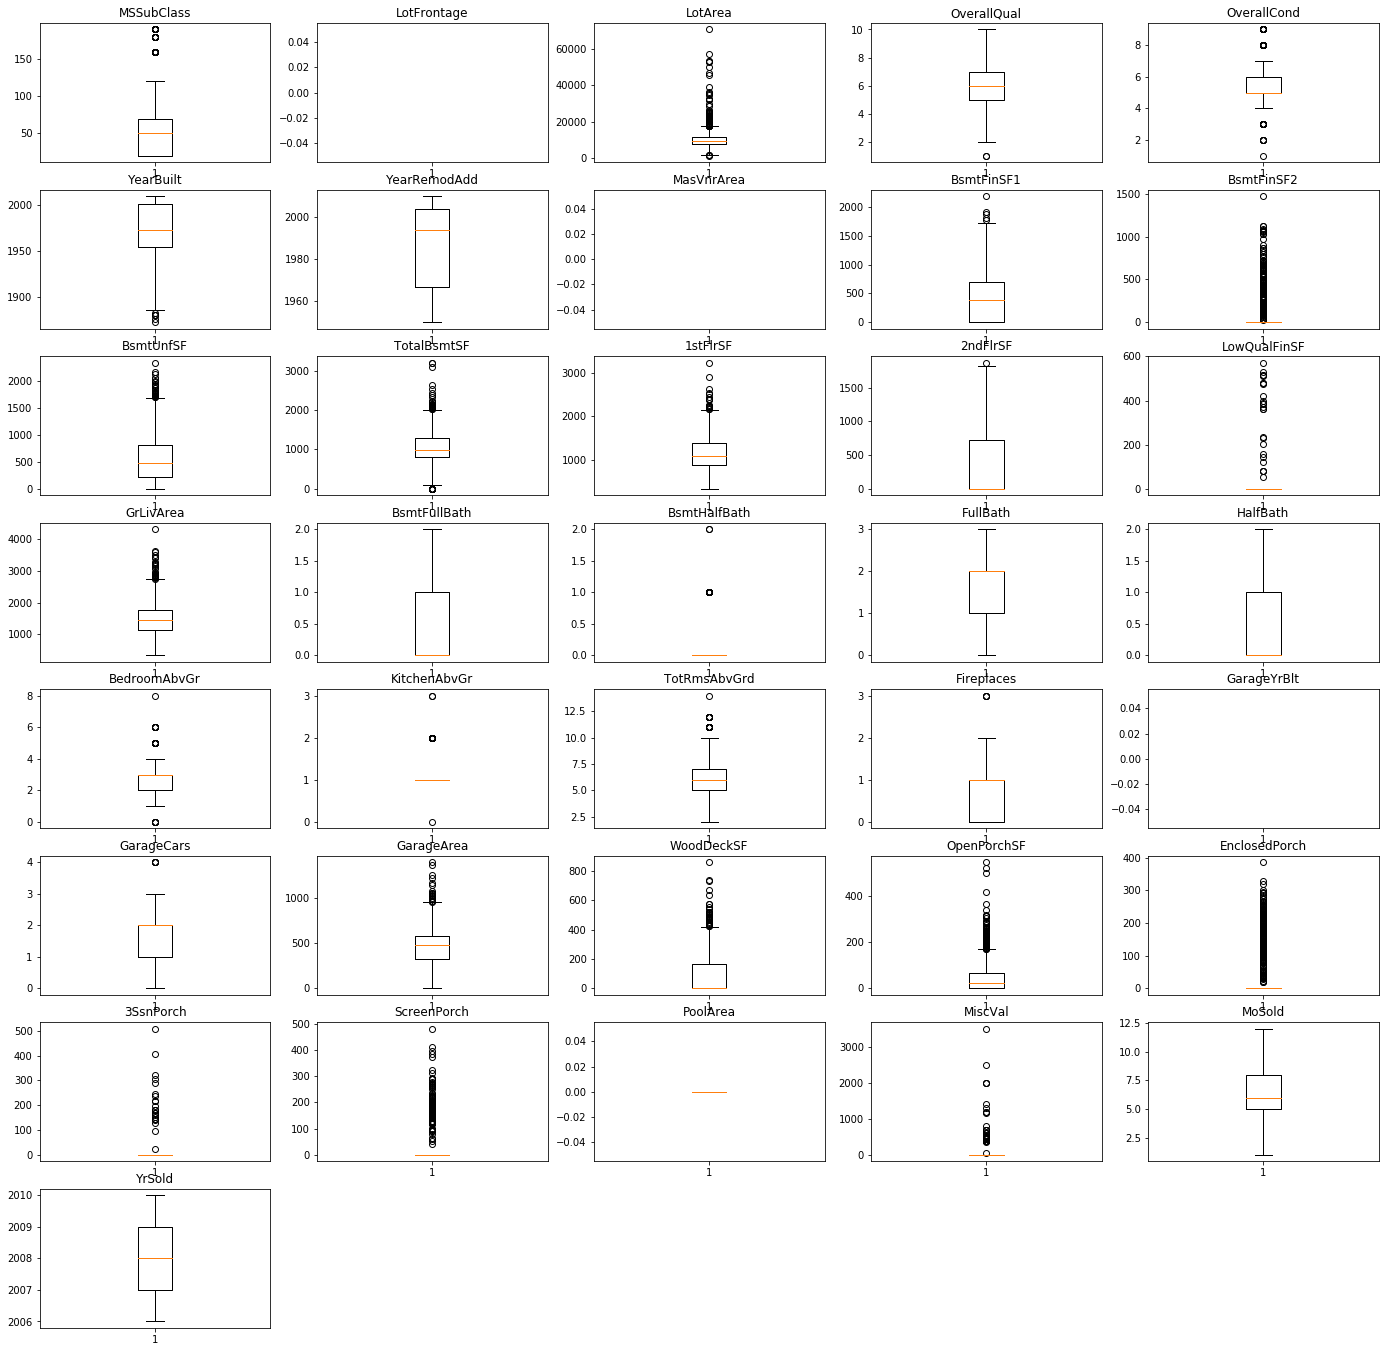

In [43]:
fig = plt.figure(figsize=(24, 24))
count = 1
for x in x_train[x_train.columns[x_train.dtypes != 'object']]:
    ax = fig.add_subplot(8,5, count)
    ax.boxplot(x_train[x])
    ax.set_title(x)
    count += 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3669B4F98>,
      dtype=object)

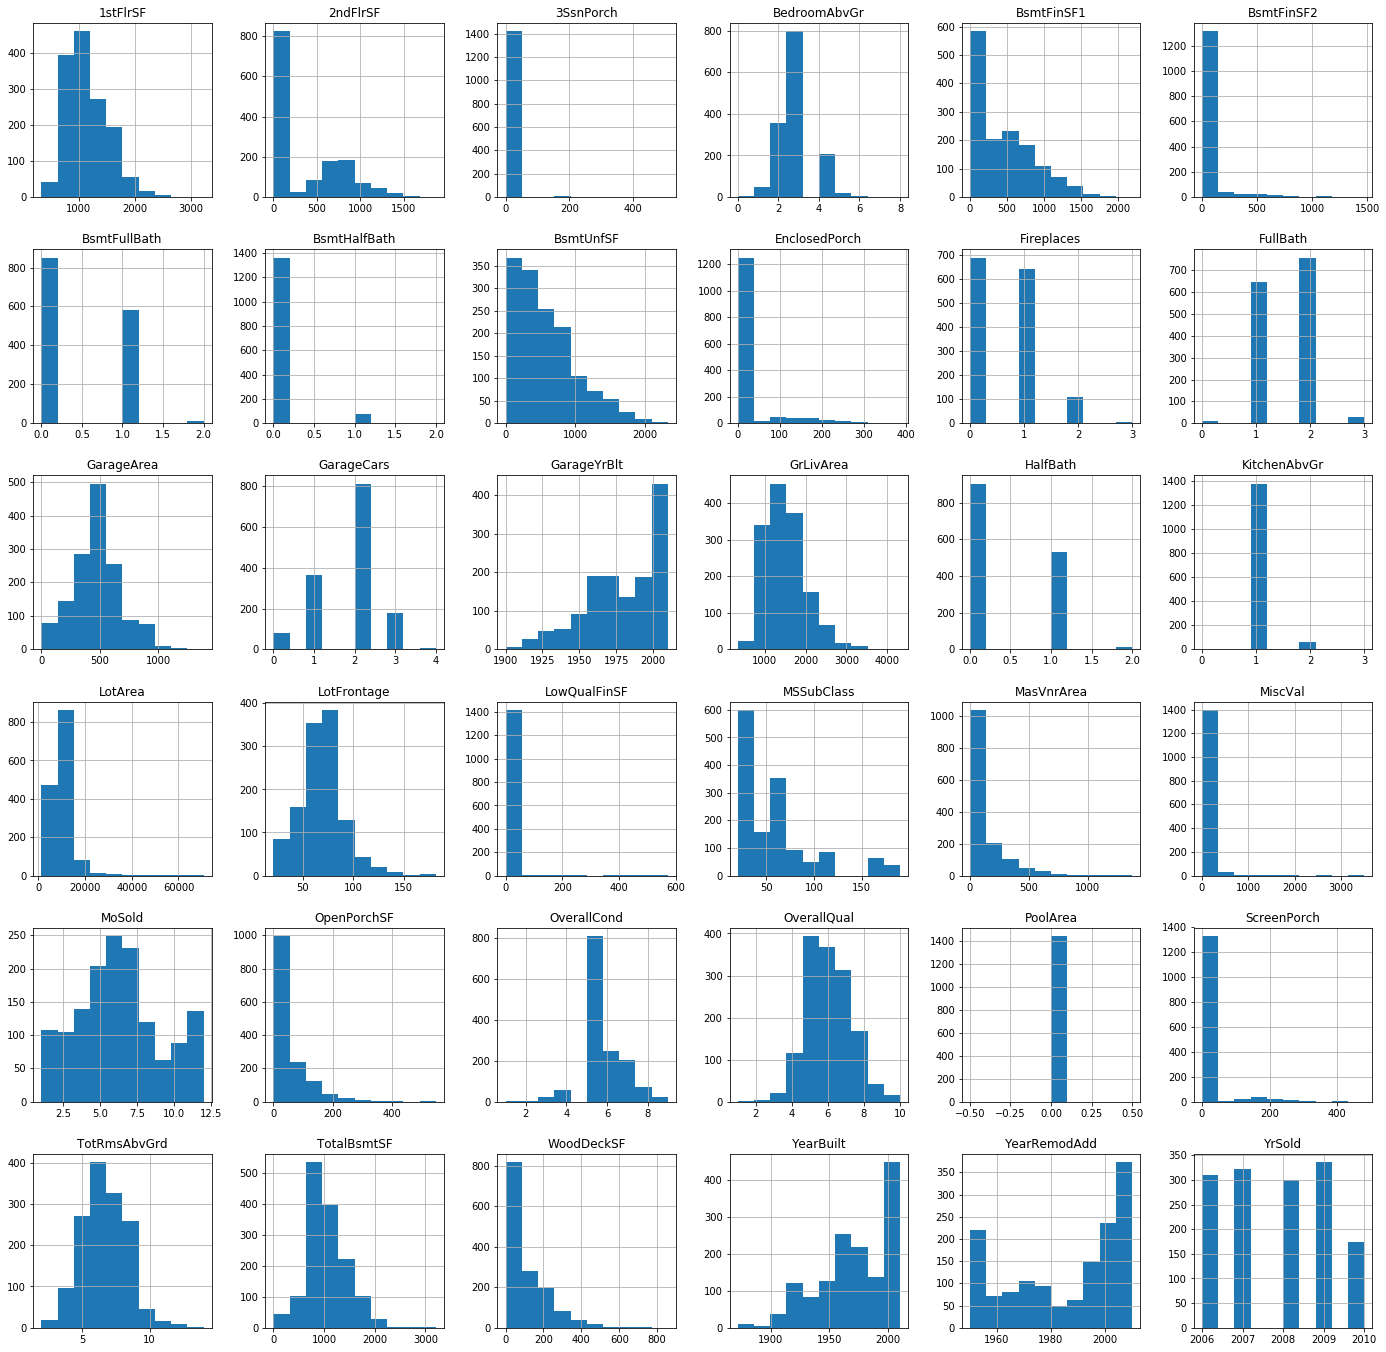

In [44]:
x_train.hist(figsize=(24, 24))

通过对数值型数据的各项指标的描述和直方图可以得出数据分布看出部分数据缺失，如`MSSubClass`、`LotFrontage`等，而大多数数据存在偏斜分布， 如`2ndFlrSF`、`3SsnPorch`等，对于缺失的数据，可以使用中位数进行填充，对于数据分布偏斜的问题，可以通过数据规范化进行调整

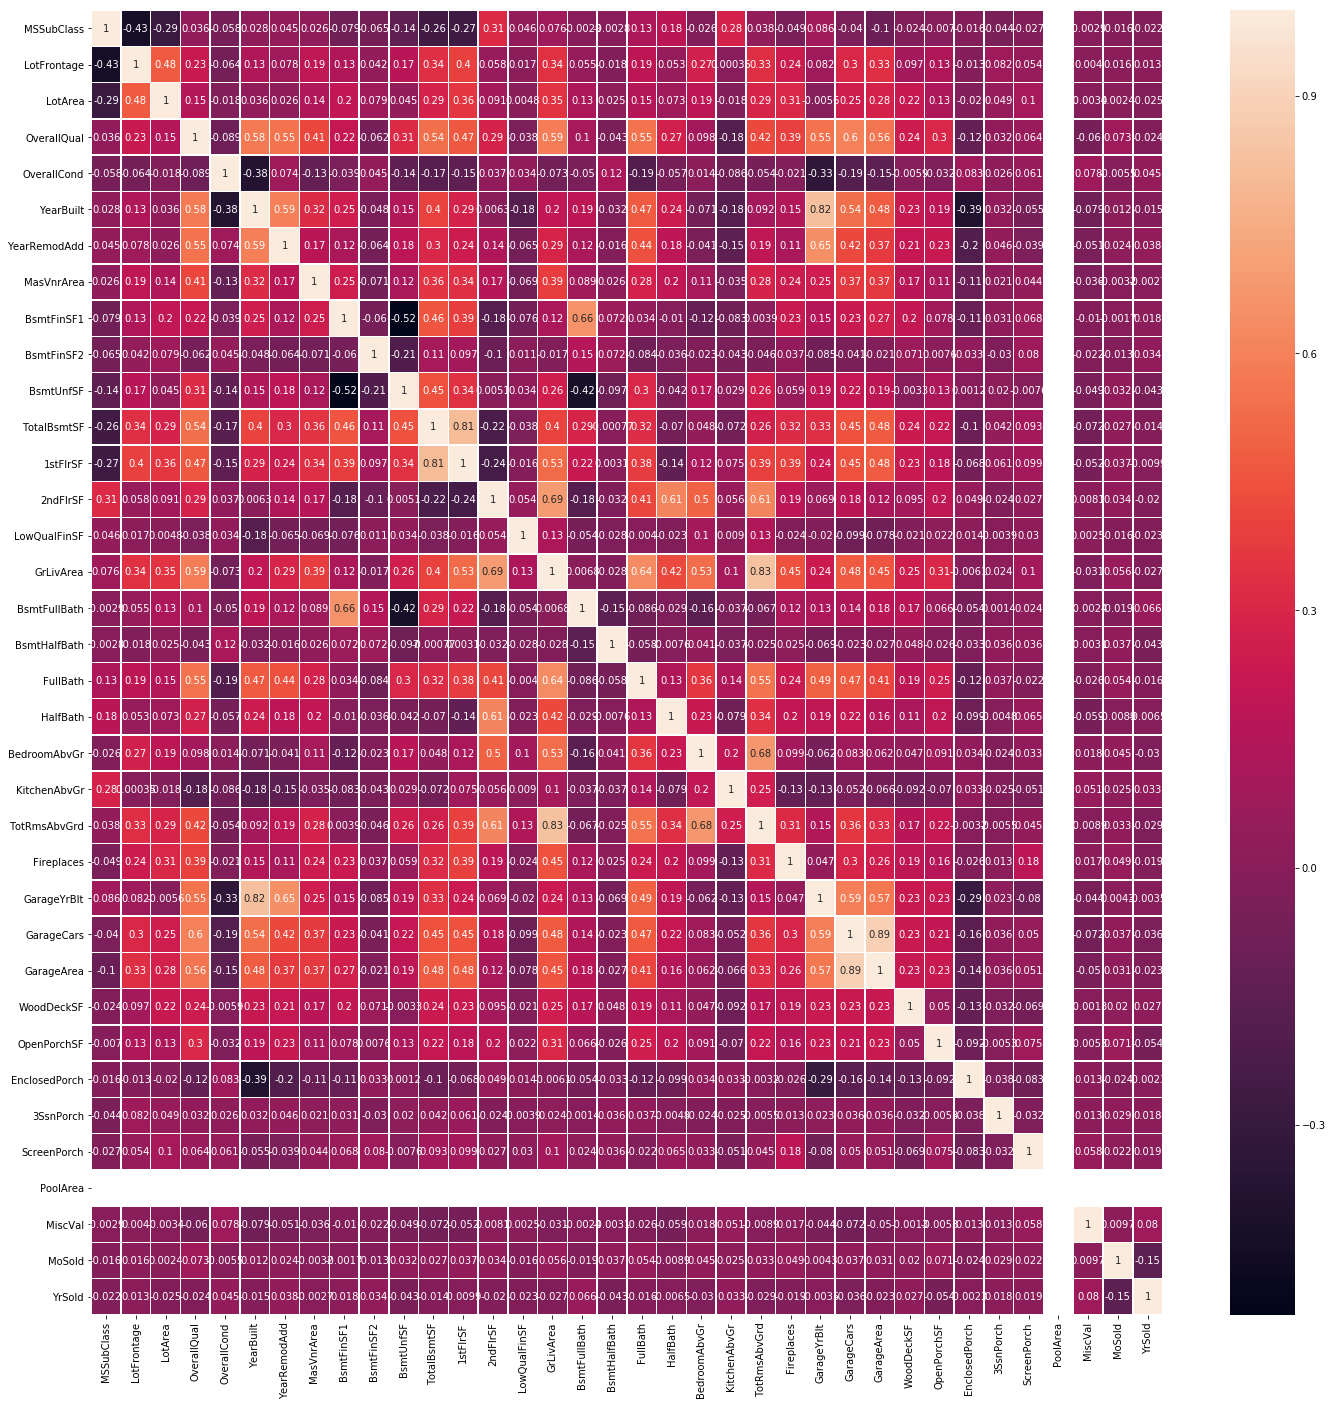

In [45]:
plt.figure(figsize=(24, 24))
sbn.heatmap(x_train.corr(), linewidths=0.5, annot=True)

通过相关性矩阵可以看出`YearBuilt`和`GarageYrBlt`、`TotRmsAbvGrd`和`GrLiveArea`、`1stFlrSF`和`TotalBsmtSF`、`GarageCars`和`GarageArea`具有很高的相关性，可以只保留一部分数据

### 非数值型数据
数值型数据无论是填充缺失值还是做规整化都是比较容易的，但非数值型数据的分析就稍显复杂了，首先是要确定非数值型数据的取值，然后是明晰每个取值的分布情况，即数量关系

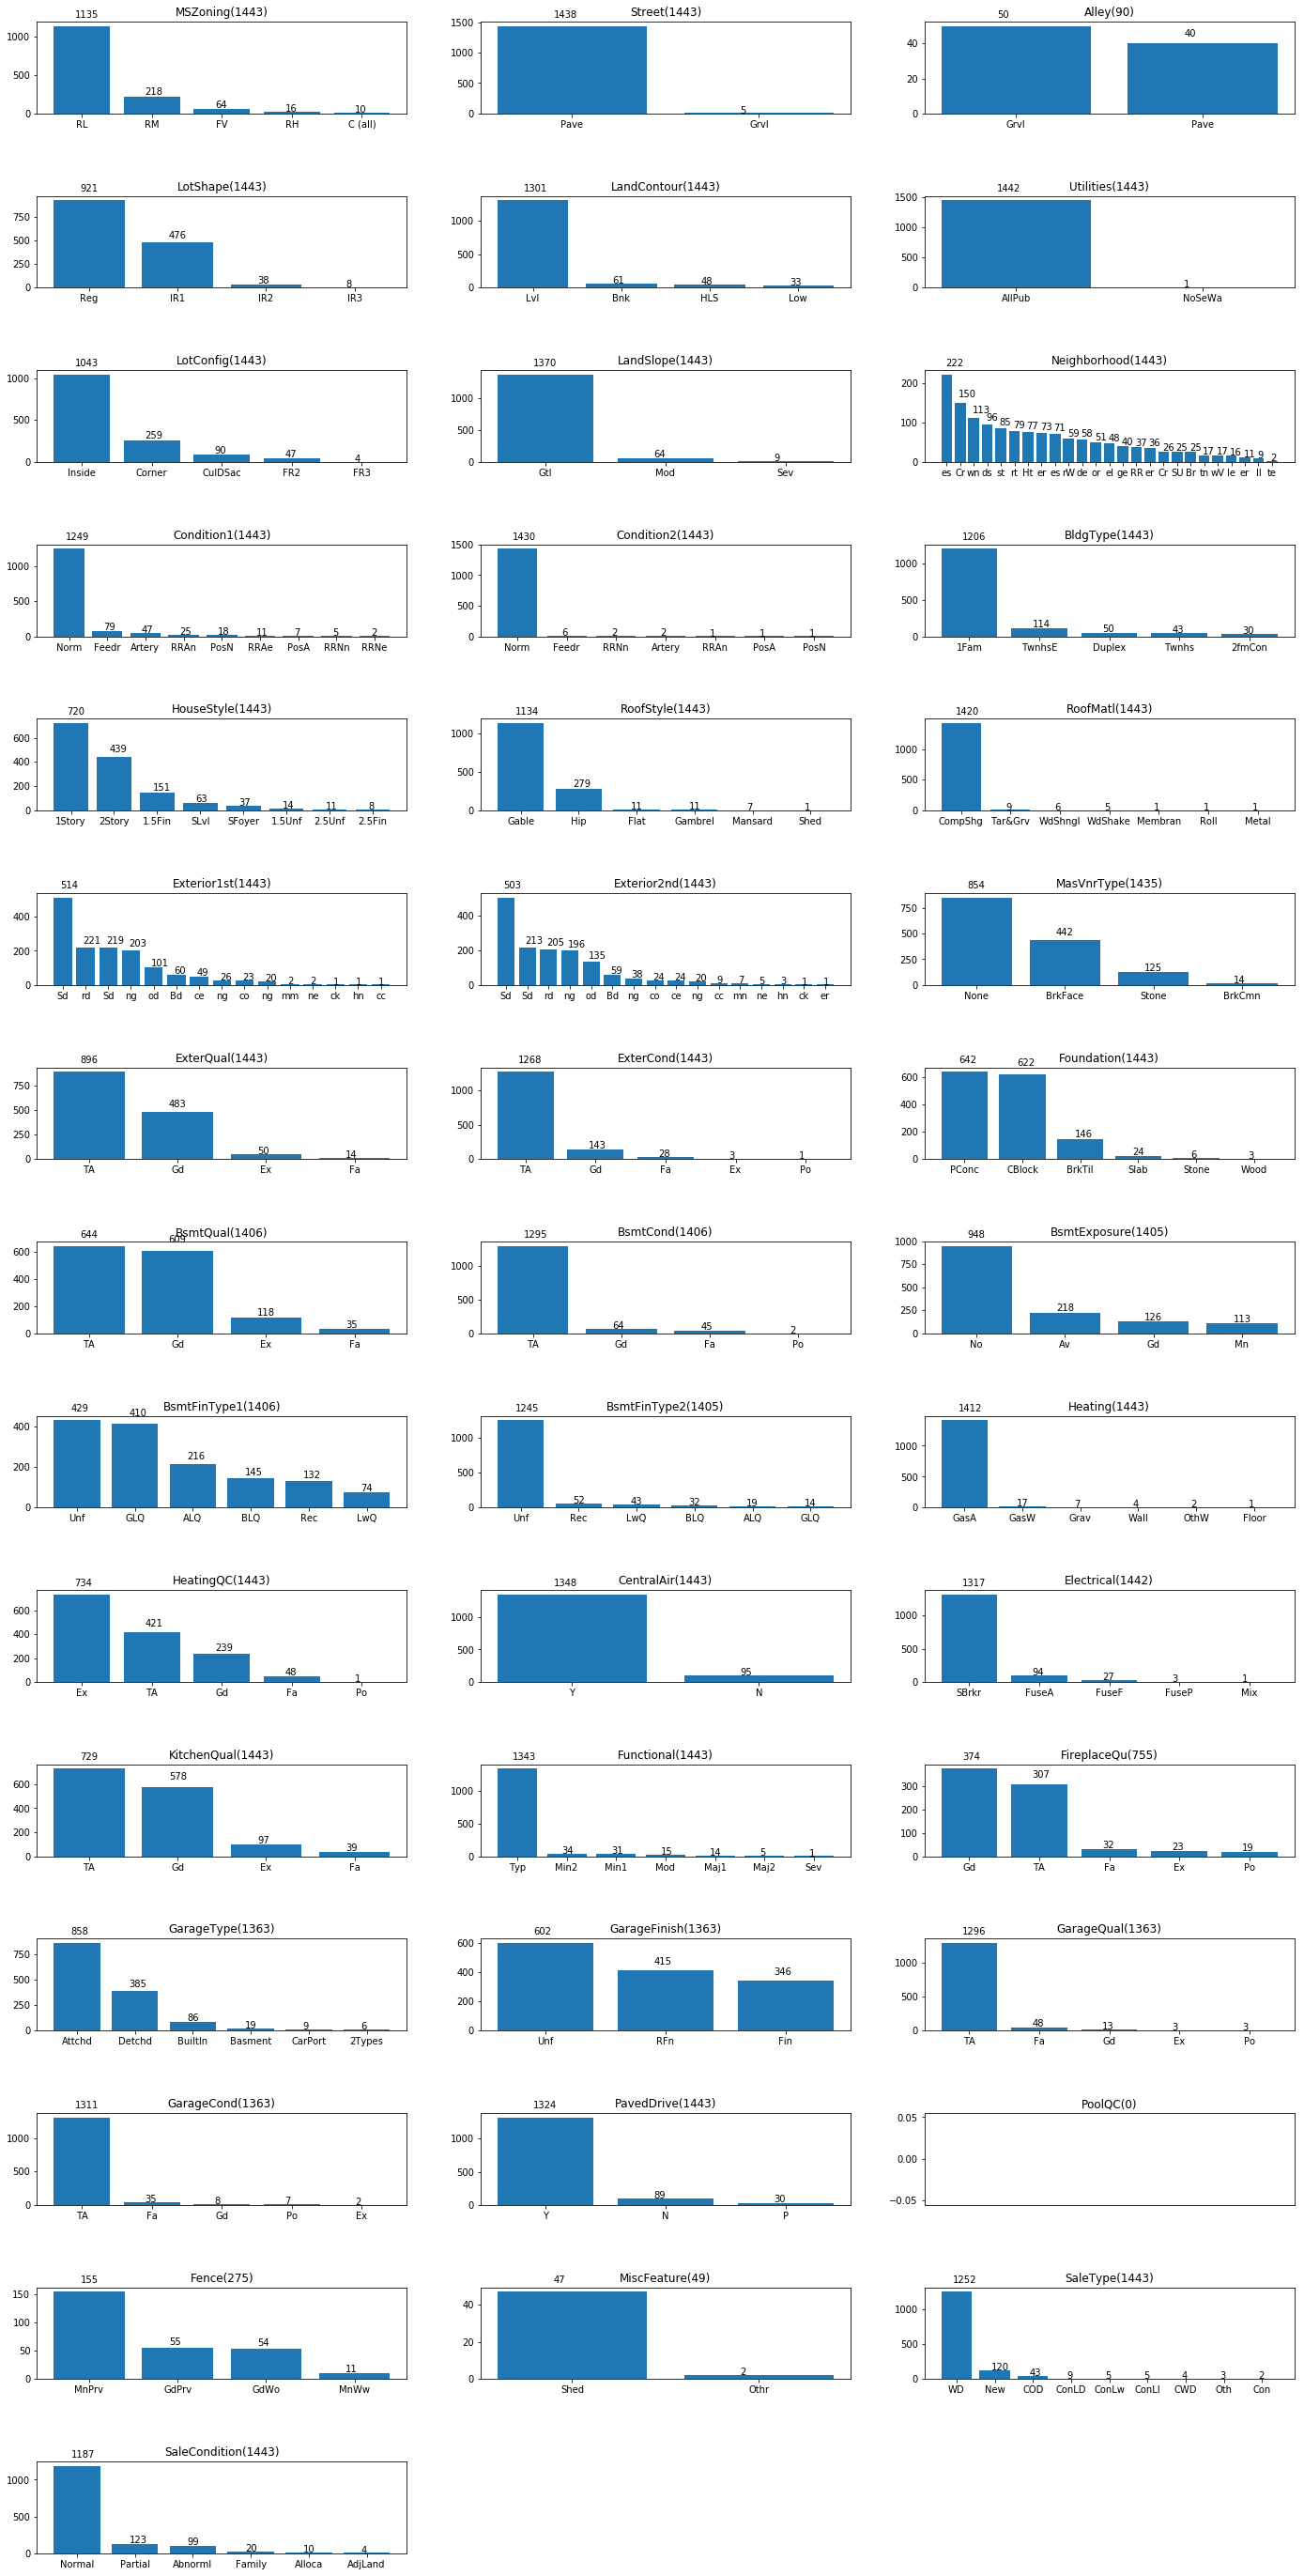

In [47]:
fig = plt.figure(figsize=(24, 48))
count = 1
for x in x_train.columns[x_train.dtypes == 'object']:
    ax = fig.add_subplot(15, 3, count)
    temp_feature = x_train[x].value_counts()
    feature_bar = ax.bar(range(temp_feature.shape[0]), temp_feature.values,  align='center')
    ax.set_xticks(np.arange(temp_feature.shape[0]))
    if temp_feature.shape[0] > 10:
        indexs = [index[-2:] for index in temp_feature.index]
        ax.set_xticklabels(indexs)
    else:
        ax.set_xticklabels(temp_feature.index)
    for bar in feature_bar:
        height = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2-0.1, 1.1*height, str(height))
#     ax.set_ylim(0, 1.2 * temp_feature.values[0])
    ax.set_title(x+'('+str(np.sum(temp_feature))+')')
    count+=1
    
plt.subplots_adjust(hspace=0.9, bottom=0.1)

    

通过柱状图可以观测出每个特征的具体数量以及特征中对应类别值的对应分布，从图中发现`Alley`、`PoolQC`、`Fence`和`MiscFeature`存在大量缺失值所以无法进行填充，需要舍弃这部分特征以保持数据的完整性，其它有缺失数据的特征可以使用当前特征中数量最多的类别进行填充

## 处理数据
在这个阶段，结合以上对数据的观察与分析，着手对数据的预处理，包括填充空值，处理类别数据，筛选特征等

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import learning_curve

class FeatureSelect(BaseEstimator, TransformerMixin):
    """特征选取"""
    def __init__(self, obj=True):
        self.obj = obj
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[X.columns[X.dtypes == 'object']] if self.obj else X[X.columns[X.dtypes != 'object']] 
    
class StringImputer(BaseEstimator, TransformerMixin):
    """填充String类型的空值"""
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                        index=X.columns)
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)
    
class DropFeature(BaseEstimator, TransformerMixin):
    """删除部分特征"""
    def __init__(self, features):
        self.features = features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(self.features, axis=1)

class RemoveOutlier(BaseEstimator, TransformerMixin):
    """处理异常值"""
    def fit(self, X, y=None):
        X
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.upper = q3 + 1.5 * iqr
        self.down = q1 - 1.5 * iqr
        self.median = X.median()
        return self
        
    def transform(self, X, y=None):
        X.where(X <= self.upper, self.upper, axis=1, inplace=True)
        X.where(X >= self.down, self.down, axis=1, inplace=True)
        return X
    
def plot_learning_curve(model, X, y):
    train_size, train_scores, test_scores = learning_curve(model, X, y, 
                                                           n_jobs=-1, verbose=True, cv=10, random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_size, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color='r')
    plt.fill_between(train_size, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1,
                    color='b')
    plt.plot(train_size, train_scores_mean, 'r-', label='train')
    plt.plot(train_size, test_scores_mean, 'b--',label='val')
    plt.ylim(0.5, 1.05)
    plt.yticks( np.linspace(0.5, 1, 11))
    plt.xlabel('Train Size', fontsize=14)
    plt.ylabel('acc', fontsize=14)
    plt.legend(loc='lower right')

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
numeric_pipeline = Pipeline([
        ('drop', DropFeature(['Alley','PoolQC', 'Fence', 'MiscFeature', 'PoolArea',
                              'YearBuilt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageCars'])),
        ('selector', FeatureSelect(False)),
        ('outlier', RemoveOutlier()),
        ('impute', SimpleImputer(strategy='median')),
        ('standard', StandardScaler())
])

cat_pipeline = Pipeline([
        ('drop', DropFeature(['Alley','PoolQC', 'Fence', 'MiscFeature'])),
        ('selector', FeatureSelect()),
        ('impute', StringImputer()),
        ('oneHot', OneHotEncoder())
])

full_pipeline = FeatureUnion([
        ('numeric_pipeline', numeric_pipeline),
        ('cat_pipeline', cat_pipeline)
])

x_train = full_pipeline.fit_transform(x_train)

# 模型选择
这里将尝试数个模型，比较它们的性能，来选择最优的模型

## 线性回归

## 线性回归

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = cross_val_predict(lr, x_train, y_train, 
                            verbose=True, n_jobs=-1, cv=3)
lr_mse = mean_squared_error(lr_pred, y_train)
np.sqrt(lr_mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


26365.303006287446

[learning_curve] Training set sizes: [ 129  421  713 1005 1298]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished


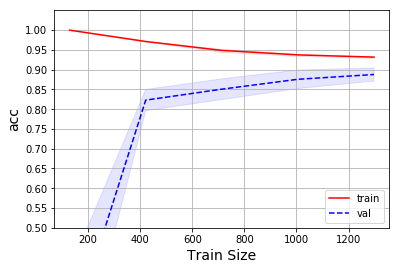

In [69]:
plot_learning_curve(lr, x_train, y_train)

从学习曲线中可以看出训练正确率和验证正确率比较接近，可以说线性模型就已经有不错的表现

## 岭回归

In [52]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, solver='sag')
ridge_pred = cross_val_predict(ridge, x_train, y_train, 
                               cv=3, verbose=True, n_jobs=-1)
ridge_mse = mean_squared_error(y_train, ridge_pred)
np.sqrt(ridge_mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


25478.01949221505

[learning_curve] Training set sizes: [ 129  421  713 1005 1298]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


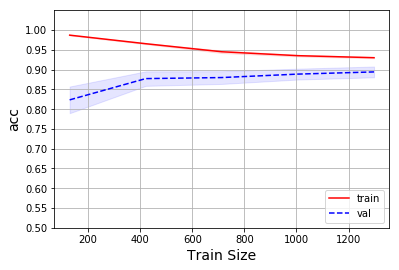

In [53]:
plot_learning_curve(ridge, x_train, y_train)

使用岭回归可以看到训练正确率有所下降，验证正确率有所上升，下面再试试`LASSO`回归

## LASSO回归

In [139]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso_pred = cross_val_predict(lasso, x_train, y_train, 
                               cv=3, verbose=True, n_jobs=-1)
lasso_mse = mean_squared_error(lasso_pred, y_train)
np.sqrt(lasso_mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


31752.859436871207

[learning_curve] Training set sizes: [ 131  427  722 1018 1314]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.7s finished


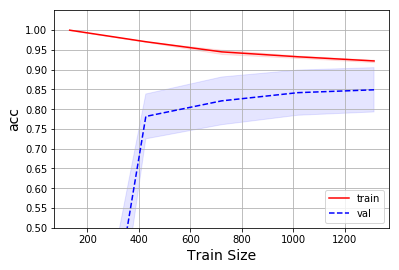

In [140]:
plot_learning_curve(lasso, x_train, y_train)

可以看出`Lasso`的效果并没有岭回归好，可能是因为`Lasso`使用`l1`范数稀疏掉了过多的特征导致其泛化能力的下降

### KernelPCA

In [19]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
lr_with_kpca_pipeline = Pipeline([
    ('kpca', KernelPCA()),
    ('lr', LinearRegression())
])

lr_with_kpca_param = {
    'kpca__gamma': np.linspace(0.001, 0.03, 10),
    'kpca__kernel': ['rbf', 'linear', 'poly'],
    'lr__normalize': [False, True]
}

lr_with_kpca_grid_cv = RandomizedSearchCV(lr_with_kpca_pipeline, param_distributions=lr_with_kpca_param, cv=3, 
                          verbose=True, n_jobs=-1, iid=True)
lr_with_kpca_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'kpca__gamma': array([0.001  , 0.00422, 0.00744, 0.01067, 0.01389, 0.01711, 0.02033,
       0.02356, 0.02678, 0.03   ]), 'kpca__kernel': ['rbf', 'linear', 'poly'], 'lr__normalize': [False, True]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [20]:
lr_with_kpca_grid_cv.best_params_

{'kpca__gamma': 0.023555555555555552,
 'kpca__kernel': 'rbf',
 'lr__normalize': False}

In [21]:
lr_with_kpca_grid_cv.best_score_

0.8719180471722409

In [22]:
lr_with_kpca = lr_with_kpca_grid_cv.best_estimator_
lr_with_kpca_pred = cross_val_predict(lr_with_kpca, x_train, y_train, 
                            cv=3, verbose=True, n_jobs=-1)
mse = mean_squared_error(y_train, lr_with_kpca_pred)
np.sqrt(mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.5s finished


28497.941853175522

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 116  379  642  905 1168]


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.4s finished


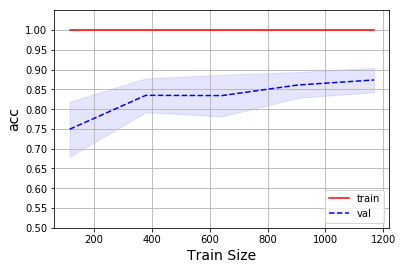

In [23]:
plot_learning_curve(lr_with_kpca, x_train, y_train)

可以明显看到，使用PCA之后训练集的准确率为`1`，这是明显的过拟合现象

## 随机森林

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf_kpca_pipeline = Pipeline([
    ('kpca', KernelPCA()),
    ('rf', RandomForestRegressor(n_estimators=100))
])
rf_kpca_param = {
    'kpca__gamma': np.linspace(0.01, 0.10, 10),
    'kpca__degree': np.arange(1, 5),
    'kpca__kernel': ['rbf', 'linear', 'poly'],
    'rf__n_estimators': np.arange(100, 1000, 100),
    'rf__max_depth': np.arange(3, 10)
}
rf_kpca_grid_cv = RandomizedSearchCV(rf_kpca_pipeline, param_distributions=rf_kpca_param,
                         cv=3, verbose=True, n_jobs=-1)
rf_kpca_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 20.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('rf', RandomForest...tors=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'kpca__gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]), 'kpca__kernel': ['rbf', 'linear', 'poly'], 'rf__n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]), 'rf__max_depth': array([3, 4, 5, 6, 7, 8, 9])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [26]:
rf_kpca_grid_cv.best_estimator_

Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=0.06000000000000001, kernel='poly',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('rf',...tors=400, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [27]:
rf_kpca_grid_cv.best_score_

0.8273617835259149

In [28]:
rf_kpca_pred = cross_val_predict(rf_kpca_grid_cv.best_estimator_, x_train, y_train, 
                                 verbose=True, n_jobs=-1, cv=3)
mse = mean_squared_error(y_train, rf_kpca_pred)
np.sqrt(mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.7min finished


33057.36494277793

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 116  379  642  905 1168]


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 16.6min finished


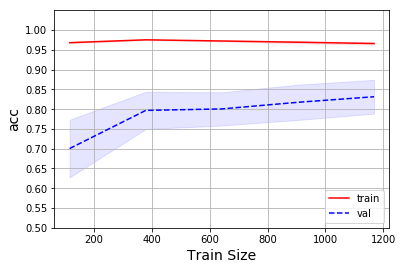

In [29]:
plot_learning_curve(rf_kpca_grid_cv.best_estimator_, x_train, y_train)

## GBDT

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gbdt_param = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(2, 10),
    'subsample': np.linspace(0.1, 1, 20),
    'max_features':['auto', 'sqrt', 'log2']
}

gbdt_grid_cv = RandomizedSearchCV(GradientBoostingRegressor(n_estimators=100), param_distributions=gbdt_param, n_jobs=-1,
                                 verbose=True, random_state=42, cv=3)
gbdt_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]), 'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'subsample': array([0.1    , 0.14737, 0.19474, 0.24211, 0.28947, 0.33684, 0.38421,
       0.43158, 0.47895, 0.52632, 0.57368, 0.62105, 0.66842, 0.71579,
       0.76316, 0.81053, 0.85789, 0.90526, 0.95263, 1.     ]), 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=42, refit=Tr

In [68]:
gbdt_grid_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=0.5263157894736842, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
gbdt_grid_cv.best_score_

0.8847951776302204

In [70]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
gbdt = gbdt_grid_cv.best_estimator_
gbdt_pred = cross_val_predict(gbdt, x_train, y_train,
                             verbose=True, n_jobs=-1, cv=5)
mse = mean_squared_error(y_train, gbdt_pred)
np.sqrt(mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


28960.75721856381

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  427  722 1018 1314]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished


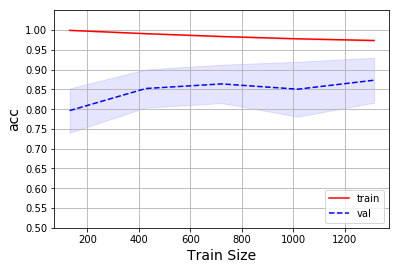

In [71]:
plot_learning_curve(gbdt, x_train, y_train)

## XGBoost

In [24]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
xg = XGBRegressor(n_estimators=100, n_jobs=-1, booster='gbtree')
xg_pipeline = Pipeline([
    ('kpca',KernelPCA()),
    ('xg', xg)
])
xg_param = {
    'kpca__gamma': np.linspace(0.01, 0.10, 10),
    'kpca__kernel': ['rbf', 'linear', 'poly'],
    'xg__n_estimators': np.arange(100, 1000, 100),
    'xg__max_depth': np.arange(2, 10) 
}
xg_grid_cv = RandomizedSearchCV(xg_pipeline, param_distributions=xg_param, cv=3,
                               n_jobs=-1, verbose=True)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.9min finished
/usr/local/lib/python3.7/site-packages/xgboost-0.83.dev0-py3.7.egg/xgboost/core.py:591: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.7/site-packages/xgboost-0.83.dev0-py3.7.egg/xgboost/core.py:592: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:54:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('xg', XGBRegressor...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'kpca__gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]), 'kpca__kernel': ['rbf', 'linear', 'poly'], 'xg__n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]), 'xg__max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [25]:
xg_grid_cv.best_estimator_

Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=0.07, kernel='poly',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('xg', XGBRegressor(b...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])

In [26]:
xg_grid_cv.best_score_

0.8450601000115967

In [27]:
xg_pred = cross_val_predict(xg_grid_cv.best_estimator_, x_train, y_train, 
                            cv=3, verbose=True, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished


In [28]:
mse = mean_squared_error(y_train, xg_pred)
np.sqrt(mse)

31279.9583917832

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  427  722 1018 1314]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.8s finished


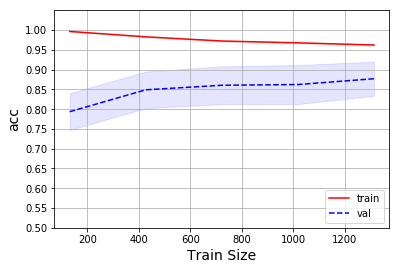

In [29]:
plot_learning_curve(xg, x_train, y_train)

In [21]:
XGBRegressor?

# 预测

In [70]:
test = pd.read_csv('house_price/test.csv')
index = np.array(test[['Id']])[:,0]
test = test.set_index(['Id'])
x_test = full_pipeline.transform(test)

In [71]:
ridge.fit(x_train, y_train)
pred =  ridge.predict(x_test)
pred_df = pd.DataFrame({'Id':index,
                       'SalePrice':pred})
pred_df.to_csv('./house_price/prediction.csv', index='')

In [109]:
StandardScaler?